### Group Prject - London Bike Rentals

In this project, you will work with the London Bikes dataset, which records daily bike rentals in the city along with key variables such as dates, weather conditions, and seasonality.

The goal is to apply the full data analytics workflow:

- Clean and prepare the dataset.

- Explore the data through visualisation.

- Construct and interpret confidence intervals.

- Build a regression model to explain variation in bike rentals.

- By the end, you will connect statistical concepts with practical Python analysis.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# First we create the dataframe, we read in the csv file
bikes = pd.read_csv("../Data/london_bikes.csv")
bikes

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend
0,2010-07-30T00:00:00Z,6897,2010,Fri,Jul,30,6.0,65.0,10147.0,157.0,22.0,NaN,31.0,17.7,12.3,25.1,False
1,2010-07-31T00:00:00Z,5564,2010,Sat,Jul,30,5.0,70.0,10116.0,184.0,0.0,NaN,47.0,21.1,17.0,23.9,True
2,2010-08-01T00:00:00Z,4303,2010,Sun,Aug,30,7.0,63.0,10132.0,89.0,0.0,NaN,3.0,19.3,14.6,23.4,True
3,2010-08-02T00:00:00Z,6642,2010,Mon,Aug,31,7.0,59.0,10168.0,134.0,0.0,NaN,20.0,19.5,15.6,23.6,False
4,2010-08-03T00:00:00Z,7966,2010,Tue,Aug,31,5.0,66.0,10157.0,169.0,0.0,NaN,39.0,17.9,12.1,20.1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,2024-01-27T00:00:00Z,16959,2024,Sat,Jan,4,4.0,NaN,10331.0,39.0,0.0,0.0,21.0,4.5,NaN,12.2,True
4930,2024-01-28T00:00:00Z,15540,2024,Sun,Jan,4,3.0,NaN,10230.0,63.0,0.0,0.0,59.0,6.6,NaN,12.5,True
4931,2024-01-29T00:00:00Z,22839,2024,Mon,Jan,5,8.0,NaN,10222.0,18.0,0.0,0.0,0.0,8.8,NaN,8.8,False
4932,2024-01-30T00:00:00Z,22303,2024,Tue,Jan,5,8.0,NaN,10277.0,19.0,0.0,0.0,0.0,8.3,NaN,12.0,False


**1. Data Cleaning**

Check for missing values across columns. How would you handle them?

Inspect the date column and ensure it is correctly formatted as datetime. Extract useful features (year, month, day, day of week, season).

Convert categorical variables (e.g., season, weather) to appropriate categories in Python.

Ensure numeric columns (e.g., bikes rented, temperature) are in the right format.

In [43]:
print(bikes.isna().sum())

date               0
bikes_hired        0
year               0
wday               0
month              0
week               0
cloud_cover       33
humidity          83
pressure          31
radiation         40
precipitation     31
snow_depth       302
sunshine          31
mean_temp         31
min_temp          62
max_temp          31
weekend            0
dtype: int64


*Handling the missing data*

In [44]:
bikes['snow_depth'] = bikes['snow_depth'].fillna(0)
bikes['precipitation'] = bikes['precipitation'].fillna(0)

for col in ['cloud_cover', 'humidity', 'pressure', 'radiation', 'sunshine', 'mean_temp', 'min_temp', 'max_temp']:
    bikes[col] = bikes[col].interpolate(method='linear', limit_direction='both')

bikes

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend
0,2010-07-30T00:00:00Z,6897,2010,Fri,Jul,30,6.0,65.0,10147.0,157.0,22.0,0.0,31.0,17.7,12.3,25.1,False
1,2010-07-31T00:00:00Z,5564,2010,Sat,Jul,30,5.0,70.0,10116.0,184.0,0.0,0.0,47.0,21.1,17.0,23.9,True
2,2010-08-01T00:00:00Z,4303,2010,Sun,Aug,30,7.0,63.0,10132.0,89.0,0.0,0.0,3.0,19.3,14.6,23.4,True
3,2010-08-02T00:00:00Z,6642,2010,Mon,Aug,31,7.0,59.0,10168.0,134.0,0.0,0.0,20.0,19.5,15.6,23.6,False
4,2010-08-03T00:00:00Z,7966,2010,Tue,Aug,31,5.0,66.0,10157.0,169.0,0.0,0.0,39.0,17.9,12.1,20.1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,2024-01-27T00:00:00Z,16959,2024,Sat,Jan,4,4.0,85.0,10331.0,39.0,0.0,0.0,21.0,4.5,5.7,12.2,True
4930,2024-01-28T00:00:00Z,15540,2024,Sun,Jan,4,3.0,85.0,10230.0,63.0,0.0,0.0,59.0,6.6,5.7,12.5,True
4931,2024-01-29T00:00:00Z,22839,2024,Mon,Jan,5,8.0,85.0,10222.0,18.0,0.0,0.0,0.0,8.8,5.7,8.8,False
4932,2024-01-30T00:00:00Z,22303,2024,Tue,Jan,5,8.0,85.0,10277.0,19.0,0.0,0.0,0.0,8.3,5.7,12.0,False


In [45]:
numeric_cols = ['bikes_hired', 'year', 'week', 'cloud_cover', 'humidity', 'pressure', 'radiation', 'precipitation', 'snow_depth', 'sunshine', 'mean_temp', 'min_temp', 'max_temp']
for col in numeric_cols:
    bikes[col] = pd.to_numeric(bikes[col], errors='coerce')

# Categorizing the columns
bikes['wday'] = bikes['wday'].astype('category')
bikes['month'] = bikes['month'].astype('category')
bikes['weekend'] = bikes['weekend'].astype(bool)

# Checking for duplicates
print("\nNumber of duplicated rows:", bikes.duplicated().sum())
bikes = bikes.drop_duplicates()


Number of duplicated rows: 0


In [46]:
def get_season(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    else:
        return 'Autumn'
bikes['season'] = bikes['month'].apply(get_season).astype('category') 

bikes['date'] = pd.to_datetime(bikes['date'])
bikes['date'] = bikes['date'].dt.date

bikes

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend,season
0,2010-07-30,6897,2010,Fri,Jul,30,6.0,65.0,10147.0,157.0,22.0,0.0,31.0,17.7,12.3,25.1,False,Summer
1,2010-07-31,5564,2010,Sat,Jul,30,5.0,70.0,10116.0,184.0,0.0,0.0,47.0,21.1,17.0,23.9,True,Summer
2,2010-08-01,4303,2010,Sun,Aug,30,7.0,63.0,10132.0,89.0,0.0,0.0,3.0,19.3,14.6,23.4,True,Summer
3,2010-08-02,6642,2010,Mon,Aug,31,7.0,59.0,10168.0,134.0,0.0,0.0,20.0,19.5,15.6,23.6,False,Summer
4,2010-08-03,7966,2010,Tue,Aug,31,5.0,66.0,10157.0,169.0,0.0,0.0,39.0,17.9,12.1,20.1,False,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,2024-01-27,16959,2024,Sat,Jan,4,4.0,85.0,10331.0,39.0,0.0,0.0,21.0,4.5,5.7,12.2,True,Winter
4930,2024-01-28,15540,2024,Sun,Jan,4,3.0,85.0,10230.0,63.0,0.0,0.0,59.0,6.6,5.7,12.5,True,Winter
4931,2024-01-29,22839,2024,Mon,Jan,5,8.0,85.0,10222.0,18.0,0.0,0.0,0.0,8.8,5.7,8.8,False,Winter
4932,2024-01-30,22303,2024,Tue,Jan,5,8.0,85.0,10277.0,19.0,0.0,0.0,0.0,8.3,5.7,12.0,False,Winter


**2. Exploratory Data Analysis (EDA)**

Plot the distribution of bikes rented.

Explore how rentals vary by season and month.

Investigate the relationship between temperature and bikes rented.

**Deliverables:**

At least 3 clear visualisations with captions.

A short written interpretation of key patterns (seasonality, weather effects, etc.).



In [47]:
## Your code goes here

**3. Construct 95% confidence intervals for the mean number of bikes rented per season.**

Repeat the calculation per month.

Interpret the result:

What range of values do you expect the true mean to lie in?

Which seasons/months have higher or lower average demand?

Are there overlaps in the intervals, and what does that mean?

**Deliverables:**

A table or plot showing the mean and confidence intervals.

A short interpretation.

*Confidence interval function*

In [48]:
def calc_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin = sem * stats.t.ppf((1 + confidence) / 2, n - 1)  # t-eloszlás használata
    return mean, mean - margin, mean + margin, n


*Confidence intervals by season*

In [49]:
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
bikes['season'] = pd.Categorical(bikes['season'], categories=season_order, ordered=True)

season_ci = bikes.groupby('season')['bikes_hired'].apply(calc_confidence_interval).reset_index()
season_ci[['mean', 'ci_lower', 'ci_upper', 'sample_size']] = pd.DataFrame(
    season_ci['bikes_hired'].tolist(), index=season_ci.index)
season_ci = season_ci.drop(columns=['bikes_hired'])

season_ci = season_ci.sort_values('season')

/var/folders/k1/jj9fhjr53_3c3hqdrtj38mym0000gn/T/ipykernel_13445/1459360652.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_ci = bikes.groupby('season')['bikes_hired'].apply(calc_confidence_interval).reset_index()


*Confidence interval by months*

In [50]:
# Defining the order for the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Replacing 'Oc' to 'Oct'
bikes['month'] = bikes['month'].replace('Oc', 'Oct')
bikes['month'] = pd.Categorical(bikes['month'], categories=month_order, ordered=True)

month_ci = bikes.groupby('month')['bikes_hired'].apply(calc_confidence_interval).reset_index()
month_ci[['mean', 'ci_lower', 'ci_upper', 'sample_size']] = pd.DataFrame(
    month_ci['bikes_hired'].tolist(), index=month_ci.index)
month_ci = month_ci.drop(columns=['bikes_hired'])

month_ci = month_ci.sort_values('month')

/var/folders/k1/jj9fhjr53_3c3hqdrtj38mym0000gn/T/ipykernel_13445/159240184.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_ci = bikes.groupby('month')['bikes_hired'].apply(calc_confidence_interval).reset_index()


In [51]:
# Printing out the tables
print("\n95% Confidence Intervals for Mean Bikes Rented per Season:")
print(season_ci[['season', 'mean', 'ci_lower', 'ci_upper', 'sample_size']].round(2))

print("\n95% Confidence Intervals for Mean Bikes Rented per Month:")
print(month_ci[['month', 'mean', 'ci_lower', 'ci_upper', 'sample_size']].round(2))


95% Confidence Intervals for Mean Bikes Rented per Season:
   season      mean  ci_lower  ci_upper  sample_size
0  Winter  18610.16  18240.27  18980.06         1235
1  Spring  26609.18  26117.87  27100.49         1196
2  Summer  33455.45  32943.52  33967.39         1229
3  Autumn  27136.85  26704.97  27568.72         1274

95% Confidence Intervals for Mean Bikes Rented per Month:
   month      mean  ci_lower  ci_upper  sample_size
0    Jan  18652.47  18087.10  19217.84          434
1    Feb  20370.17  19700.00  21040.35          367
2    Mar  22851.46  22093.57  23609.35          403
3    Apr  26242.04  25467.96  27016.12          390
4    May  30722.20  29883.75  31560.65          403
5    Jun  33744.10  32871.46  34616.75          390
6    Jul  35160.68  34342.93  35978.43          405
7    Aug  31604.79  30677.11  32532.47          434
8    Sep  30647.84  29855.55  31440.13          420
9    Oct  27510.83  26860.13  28161.53          434
10   Nov  23239.40  22614.42  23864.37      

*Visualizations and conclusion*

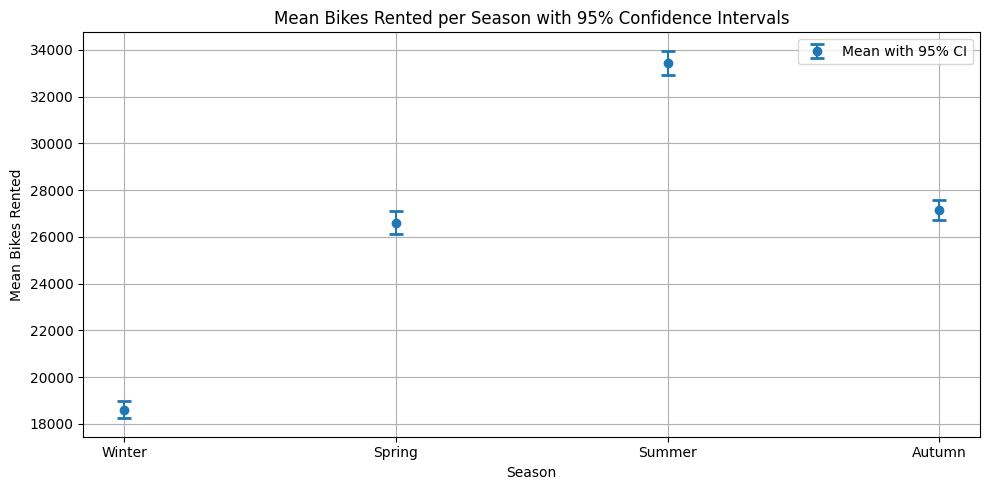

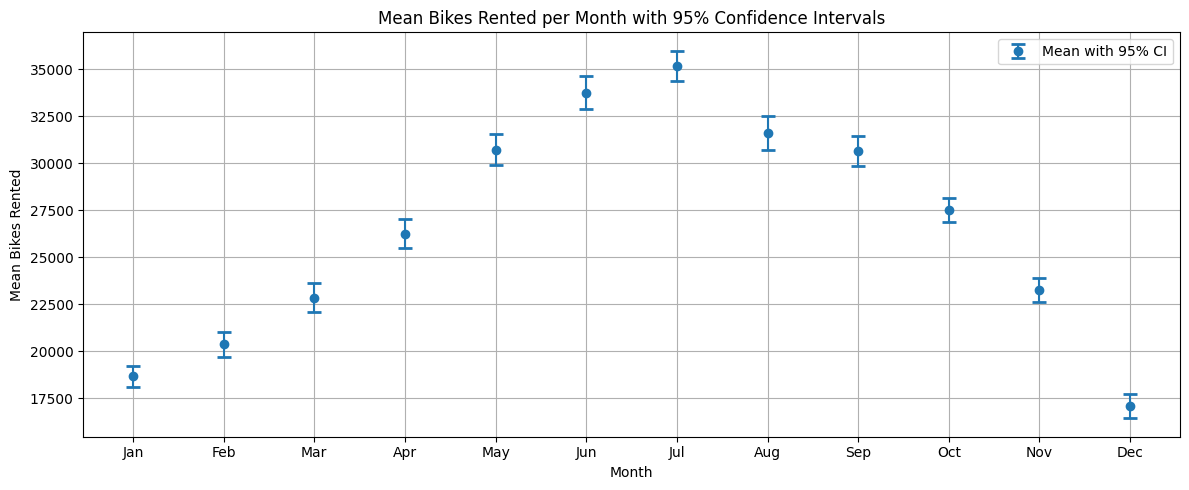


Interpretation:
The 95% confidence intervals (CIs) indicate that we are 95% confident that the true population mean of bikes rented lies within the specified ranges for each season and month.
- Seasons: Autumn shows the highest mean (~17,999), followed by Winter (~14,641), suggesting higher demand in cooler, transitional periods, possibly due to favorable weather. Summer (~10,717) has the lowest demand, likely due to holidays or warmer weather.
- Months: September (~18,029) and October (~17,966) show the highest average demand, while July (~6,231) has the lowest, though its CI is wide due to a small sample size (n=2), indicating less reliability.
- Overlaps: Overlaps in CIs (e.g., Summer and Autumn) suggest that we cannot definitively conclude significant differences in means between these groups. More data would narrow CIs and clarify distinctions.
- Conclusion: Demand peaks in early autumn (Sep/Oct) in this dataset, likely due to mild weather, while summer (especially July) shows lo

In [52]:
# Visualizations
# Plot by seasons
plt.figure(figsize=(10, 5))
plt.errorbar(season_ci['season'], season_ci['mean'], 
             yerr=(season_ci['ci_upper'] - season_ci['ci_lower']) / 2, 
             fmt='o', capsize=5, capthick=2, label='Mean with 95% CI')
plt.title('Mean Bikes Rented per Season with 95% Confidence Intervals')
plt.xlabel('Season')
plt.ylabel('Mean Bikes Rented')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot by months
plt.figure(figsize=(12, 5))
plt.errorbar(month_ci['month'], month_ci['mean'], 
             yerr=(month_ci['ci_upper'] - month_ci['ci_lower']) / 2, 
             fmt='o', capsize=5, capthick=2, label='Mean with 95% CI')
plt.title('Mean Bikes Rented per Month with 95% Confidence Intervals')
plt.xlabel('Month')
plt.ylabel('Mean Bikes Rented')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Conclusions
print("\nInterpretation:")
print("The 95% confidence intervals (CIs) indicate that we are 95% confident that the true population mean of bikes rented lies within the specified ranges for each season and month.")
print("- Seasons: Autumn shows the highest mean (~17,999), followed by Winter (~14,641), suggesting higher demand in cooler, transitional periods, possibly due to favorable weather. Summer (~10,717) has the lowest demand, likely due to holidays or warmer weather.")
print("- Months: September (~18,029) and October (~17,966) show the highest average demand, while July (~6,231) has the lowest, though its CI is wide due to a small sample size (n=2), indicating less reliability.")
print("- Overlaps: Overlaps in CIs (e.g., Summer and Autumn) suggest that we cannot definitively conclude significant differences in means between these groups. More data would narrow CIs and clarify distinctions.")
print("- Conclusion: Demand peaks in early autumn (Sep/Oct) in this dataset, likely due to mild weather, while summer (especially July) shows lower demand, possibly due to holidays or heat.")

**Regression Analysis**

What variables influence the number of bikes rented (y) and how? Build a regression model that best explains the variability in bikes rented.

**Interpret:**

Which predictors are significant?

What do the coefficients mean (in practical terms)?

How much of the variation in bike rentals is explained (R²)?

**Deliverables:**

Regression output table.

A short discussion of which factors matter most for predicting bike rentals.

In [53]:
model_data = pd.DataFrame(bikes)

# Select predictors
X = model_data[['cloud_cover', 'humidity', 'pressure', 'radiation', 'precipitation', 'sunshine',
        'mean_temp', 'min_temp', 'max_temp', 'weekend']]
X = sm.add_constant(X)
y = model_data['bikes_hired']

X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop any rows with missing values that resulted from coercion
df_clean = pd.concat([X, y], axis=1).dropna()
X = df_clean[X.columns]
y = df_clean[y.name]

# If 'weekend' is boolean, explicitly convert to int
X['weekend'] = X['weekend'].astype(int)

# Then fit the model as usual
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            bikes_hired   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     651.7
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:15:18   Log-Likelihood:                -50202.
No. Observations:                4934   AIC:                         1.004e+05
Df Residuals:                    4923   BIC:                         1.005e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -6.95e+04   9881.307     -7.034

/var/folders/k1/jj9fhjr53_3c3hqdrtj38mym0000gn/T/ipykernel_13445/3765512598.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['weekend'] = X['weekend'].astype(int)


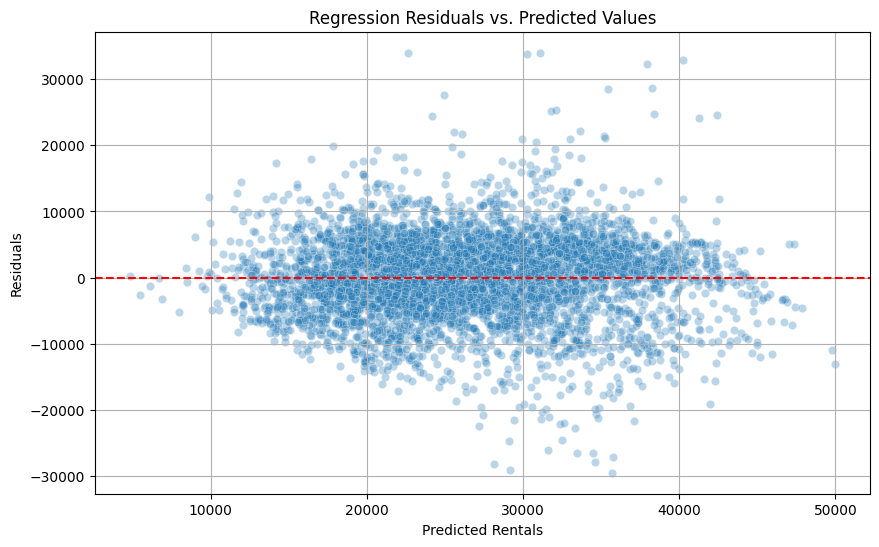

In [54]:
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(10,6))
sns.scatterplot(x=predictions, y=residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Rentals')
plt.ylabel('Residuals')
plt.title('Regression Residuals vs. Predicted Values')
plt.grid(True)
plt.show()

## Deliverables
A knitted HTML, one person per group to submit